# Exploratory analysis

Incarcarea setului de date curatat anterior in notebook-ul [2_data_cleaning.ipynb](2_data_cleaning_etl.ipynb)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
path_to_dataset = '../data/processed/2_clean_data.csv'

if not os.path.isfile(path_to_dataset):
    print('not good')

In [14]:
df = pd.read_csv(path_to_dataset)

In [15]:
df.shape

(520, 9)

In [16]:
df.head(n = 5)

,Unnamed: 0,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare,Tip_Zona
0,0,72500,41.0,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
1,2,180000,72.4,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat,Premium
2,11,106000,50.0,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
3,12,73500,57.0,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat,Standard/Urban
4,17,105000,80.0,3,1312.50,Bucium,Nou (Post-2000),Nespecificat,Periferie


In [17]:
df['Unnamed: 0'].head(n = 2)

0    0
1    2
Name: Unnamed: 0, dtype: int64

In [18]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [20]:
df.tail(n = 5)

,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare,Tip_Zona
515,112900,57.0,2,1980.70,Tatarasi-Tudor,Clasic (1977-2000),Nespecificat,Standard/Urban
516,125500,75.0,3,1673.33,Nicolina-CUG,Clasic (1977-2000),Decomandat,Accesibil/Rezidential
517,59000,35.0,1,1685.71,Nicolina-CUG,Clasic (1977-2000),Decomandat,Accesibil/Rezidential
518,127000,74.0,3,1716.22,Nicolina-CUG,Clasic (1977-2000),Nespecificat,Accesibil/Rezidential
519,90000,55.0,3,1636.36,Tatarasi-Tudor,Clasic (1977-2000),Semidecomandat,Standard/Urban


### Analiza statistica a variabilelor categoriale

- **Tabelarea datelor** - Tabele de contingenta, cum ar fi Tip_Zona vs Compartimentare, Zona vs Vechime_Imobil

- **Analiza de asociere** - Testul chi patrat, pentru a vedea daca tipul zonei influenteaza modul din care sunt compartimentate apartamentele

- **Analiza de concordanta** 

In [21]:
pd.crosstab(df['Tip_Zona'], df['Compartimentare'], margins=False)

Compartimentare,Decomandat,Nespecificat,Semidecomandat
Tip_Zona,,,
Accesibil/Rezidential,124,49,3
Periferie,13,24,1
Premium,36,34,3
Standard/Urban,101,102,30


In [22]:
pd.crosstab(df['Tip_Zona'], df['Vechime_Imobil'], margins=True)

Vechime_Imobil,Clasic (1977-2000),Nou (Post-2000),Vechi (Pre-1977),All
Tip_Zona,,,,
Accesibil/Rezidential,95,72,9,176
Periferie,4,33,1,38
Premium,33,31,9,73
Standard/Urban,104,52,77,233
All,236,188,96,520


In [23]:
33/38 * 100

86.8421052631579

In [24]:
9/73 * 100

12.32876712328767

### OBS:

- In tipul de zona "Standard/Urban", adica ['Tatarasi-Tudor', 'Podu-Ros-Cantemir', 'Pacurari-Canta', 'Alexandru-Dacia'] sunt mai multe apartamente Vechi (Pre-1977) decat apartemente Noi (Post-2000)

- La periferie cele mai multe apartamente sunt noi, cu un procentaj de 86.84%

- La tipul de zona premium ['Copou-Saras', 'Centru-Civic'] sunt si apartamente vechi, cu un procentaj de 12.32%

### Chi-Square Test

- Ne ajuta sa vedem daca exista legaturi importante intre variabilele noastre categoriale, de exemplu "Tip_Zona" vs "Vechime_Imobil"

In [25]:
from scipy.stats import chi2_contingency

In [26]:
def perform_chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    significant = p < 0.05
    return chi2, p, significant

results = perform_chi_square_test(df, 'Tip_Zona', 'Vechime_Imobil')

results

(np.float64(104.79462993929755), np.float64(2.5020522501029243e-20), np.True_)

### Interpretarea valorilor

- Chi-square calculat = 104.79, destul de mare. Masoara distanta dintre ceea ce am observat in datele mele si ceea ce s-ar fi asteptat sa apara daca zonele si vechimea imobilelor nu ar fi avut nicio legatura. Cu cat e mai mare, cu atat legatura este mai puternica

- p-value = 2.5 x pow(10, -20) < 0.05, respingem ipoteza nula H0

- significant = True, confirmare ca s-ar putea sa fie o legatura semnificativa

### Concluzie

Se respinge ipoteza de independenta cu un risc asumat de 5%, existand dovezi statistice ca tipul zonei este corelat cu vechimea imobilului

### Traducere 

Testul spune ca exista o legatura, dar nu poate sugera care este exact.

Privind datele, legatura este:

- Zonele Premium ['Copou-Saras', 'Centru-Civic'] au un mix de cladiri clasice si noi

- Zonele Standard ['Tatarasi-Tudor', 'Podu-Ros-Cantemir', 'Pacurari-Canta', 'Alexandru-Dacia'] sunt dominate de blocuri clasice sau vechi

- Zonele de Periferie [Bucium, Periferie-Metropolitana] sunt dominate de blocuri noi, cu un procentaj de peste 85%

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pret             520 non-null    int64  
 1   Suprafata_Utila  520 non-null    float64
 2   Camere           520 non-null    int64  
 3   Pret_mp          520 non-null    float64
 4   Zona             520 non-null    object 
 5   Vechime_Imobil   520 non-null    object 
 6   Compartimentare  520 non-null    object 
 7   Tip_Zona         520 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 32.6+ KB


In [39]:
perform_chi_square_test(df, 'Zona', 'Camere')

(np.float64(46.90275383331749), np.float64(0.0002187778580279596), np.True_)

### Interpretare

- chi-square calculat = 46.902

- p-value = 0.0002 < 0.05, respingem ipoteza nula H0

- significant = True, legatura semnificativa

### Concluzie

Respingem ipoteza de independenta cu un risc asumat de 5%, existand dovezi statistice ca zona din Iasi este corelata cu numarul de camere al apartamentului

In [40]:
pd.crosstab(df['Zona'], df['Camere'], margins=True)

Camere,1,2,3,All
Zona,,,,
Alexandru-Dacia,4,36,26,66
Bucium,7,17,1,25
Centru-Civic,7,26,16,49
Copou-Saras,8,14,2,24
Galata-Frumoasa,11,17,10,38
Nicolina-CUG,23,67,48,138
Pacurari-Canta,5,18,27,50
Periferie-Metropolitana,4,7,2,13
Podu-Ros-Cantemir,12,27,19,58


In [42]:
pd.crosstab(df['Tip_Zona'], df['Camere'], margins=True)

Camere,1,2,3,All
Tip_Zona,,,,
Accesibil/Rezidential,34,84,58,176
Periferie,11,24,3,38
Premium,15,40,18,73
Standard/Urban,33,117,83,233
All,93,265,162,520


In [41]:
perform_chi_square_test(df, 'Tip_Zona', 'Camere')

(np.float64(15.866965369100557), np.float64(0.014486112127644167), np.True_)

In [43]:
3/36 * 100

8.333333333333332

In [44]:
40/73 * 100

54.794520547945204

In [46]:
83/233 * 100

35.622317596566525

### Traducere

- Periferia este dominata de garsoniere si apartamente cu 2 camere, cele cu 3 avand un procentaj foarte mic, de 8%

- Apartamentele in zone Premium sunt in mare parte cu 2 camere, peste 54%

- Zonele accesibile cat si cele standard sunt dominate de apartamente cu 2 camere sau 3 camere, in zonele standard cele de 3 camere avand un procentaj semnificativ de 35%


### Analiza de concordanta

- 1. Cream tabelul de contingenta

- 2. Obtinem chi2 si n

- 3. Coeficientul de contingenta

- 4. Cramer's V

- 5. Corectie pentru bias (optional)

In [47]:
def calculeaza_concordanta(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    
    c_coeff = np.sqrt(chi2 / (chi2 + n))
    
    phi2 = chi2 / n
    r, k = contingency_table.shape
    v_coeff = np.sqrt(phi2 / min(k - 1, r - 1))
    
    return c_coeff, v_coeff

c, v = calculeaza_concordanta(df, 'Tip_Zona', 'Vechime_Imobil')
print(f"Coeficient de Contingenta: {c:.4f}")
print(f"Cramer's V: {v:.4f}")

Coeficient de Contingenta: 0.4095
Cramer's V: 0.3174


### Interpretare

- V = 0.31, care se afla intre 0.3 - 0.5, deci exista o tendinta clara (asociere medie)

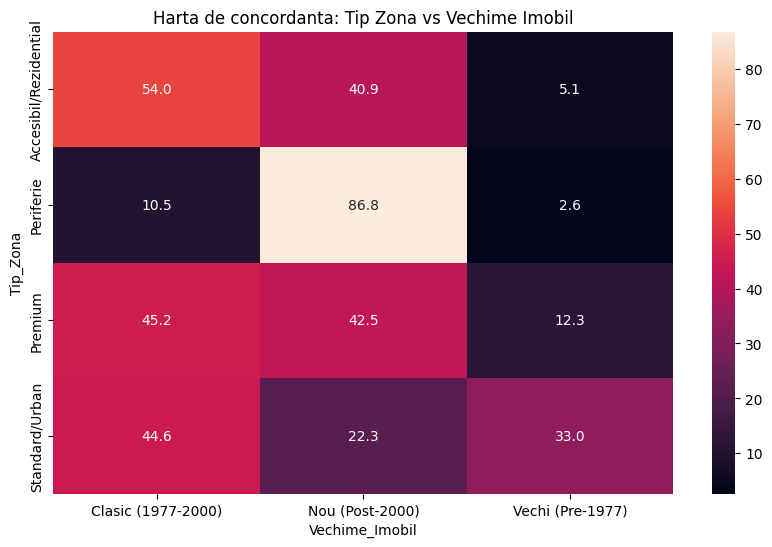

In [49]:
tabel_procente = pd.crosstab(df['Tip_Zona'], df['Vechime_Imobil'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(tabel_procente, annot=True, fmt=".1f")
plt.title('Harta de concordanta: Tip Zona vs Vechime Imobil')
plt.show()

### Traduceri

- Cum a fost observat si mai sus, este o legatura stransa intre Periferie si Nou (apartamente noi)

- La Periferie nu sunt mai deloc apartamente Vechi, doar blocuri noi cu un procentaj de peste 85%

- Blocuri Vechi si Clasice se gasesc majoritar la zone Standard/Urban

- Blocurile Clasice domina in zone Accesibil/Rezidential

- La zone Premium predomina apartamente Clasice si Noi

Pentru clarificari: 

- **Premium**: Copou-Saras, Centru-Civic

- **Standard/Urban**: Tatarasi-Tudor, Podu-Ros-Cantemir, Pacurari-Canta, Alexandru-Dacia

- **Accesibil/Rezidential**: Nicolina-CUG, Galata-Frumoasa

- **Periferie**: Bucium, Periferie-Metropolitana